In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [160]:
df = pd.read_csv('output.csv')

In [161]:
df.head()

,Product,City,Date,Index Value,% Change
0,Lamb and goat,Sydney,1948-09-01,NaN,NaN
1,Lamb and goat,Melbourne,1948-09-01,NaN,NaN
2,Lamb and goat,Brisbane,1948-09-01,NaN,NaN
3,Lamb and goat,Adelaide,1948-09-01,NaN,NaN
4,Lamb and goat,Perth,1948-09-01,NaN,NaN


In [162]:
df = df[df['Product'] == 'Fruit']
df = df.groupby(['Date'])['Index Value'].mean().reset_index()
df




,Date,Index Value
0,1948-09-01,NaN
1,1948-12-01,NaN
2,1949-03-01,NaN
3,1949-06-01,NaN
4,1949-09-01,NaN
...,...,...
294,2022-03-01,100.755556
295,2022-06-01,104.744444
296,2022-09-01,111.688889
297,2022-12-01,108.288889


In [163]:
df = df.sort_values(by='Date')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df = df[df['Index Value'].notna()]



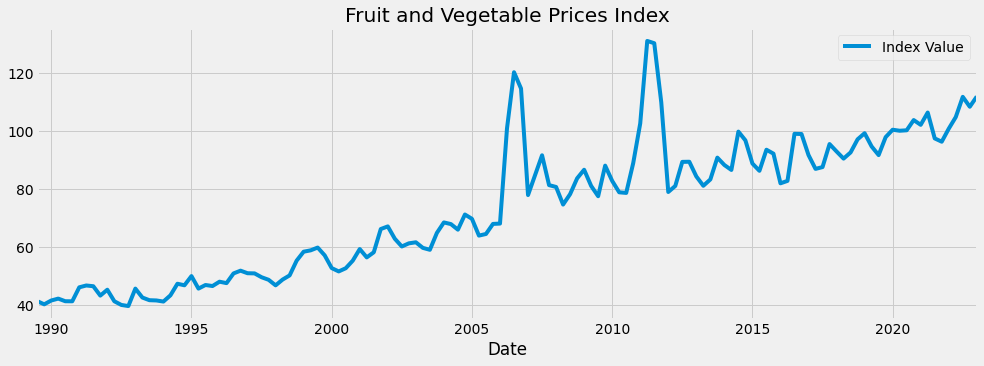

In [164]:
df.plot(style='-',
        figsize=(15, 5),
        color=color_pal[0],
        title='Fruit and Vegetable Prices Index')
plt.show()

In [165]:
train = df.loc[df.index < '01-01-2014']
test = df.loc[df.index >= '01-01-2014']

In [166]:
test

,Index Value
Date,
2014-03-01,88.266667
2014-06-01,86.566667
2014-09-01,99.744444
2014-12-01,96.733333
2015-03-01,88.777778
2015-06-01,86.266667
2015-09-01,93.522222
2015-12-01,92.166667
2016-03-01,81.977778


In [167]:
last_date = test.index[-1]
for i in range(10):
    for j in range(4):
        last_date += pd.DateOffset(months=3)
        test.loc[last_date] = np.NaN
test

/var/folders/qg/35fcv65d227brqg7pq_rvs_40000gn/T/ipykernel_24501/2349696068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[last_date] = np.NaN
/var/folders/qg/35fcv65d227brqg7pq_rvs_40000gn/T/ipykernel_24501/2349696068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[last_date] = np.NaN
/var/folders/qg/35fcv65d227brqg7pq_rvs_40000gn/T/ipykernel_24501/2349696068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,Index Value
Date,
2014-03-01,88.266667
2014-06-01,86.566667
2014-09-01,99.744444
2014-12-01,96.733333
2015-03-01,88.777778
...,...
2032-03-01,NaN
2032-06-01,NaN
2032-09-01,NaN


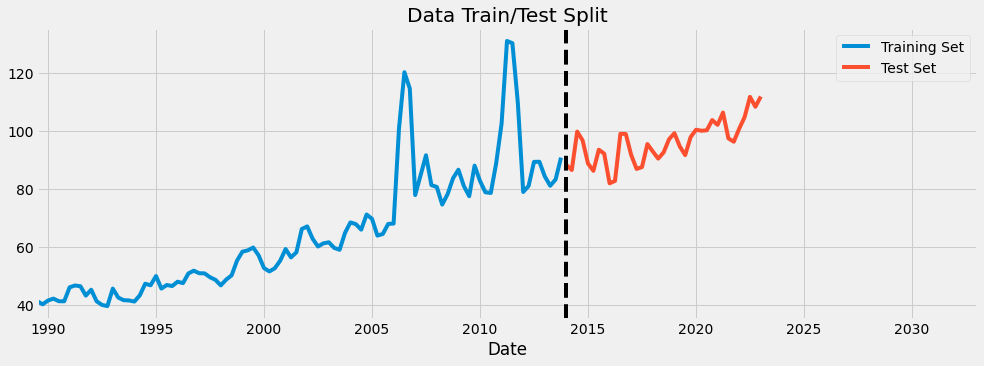

In [168]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2014', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [169]:

def create_features(df):
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    df1 = pd.get_dummies(df, columns=['quarter'], prefix=['quarter'])
    df1['quarter'] = df.index.quarter
    return df1
df = create_features(df)

In [170]:
df

,Index Value,year,quarter_1,quarter_2,quarter_3,quarter_4,quarter
Date,,,,,,,
1989-09-01,41.500000,1989,False,False,True,False,3
1989-12-01,40.388889,1989,False,False,False,True,4
1990-03-01,41.700000,1990,True,False,False,False,1
1990-06-01,42.355556,1990,False,True,False,False,2
1990-09-01,41.455556,1990,False,False,True,False,3
...,...,...,...,...,...,...,...
2022-03-01,100.755556,2022,True,False,False,False,1
2022-06-01,104.744444,2022,False,True,False,False,2
2022-09-01,111.688889,2022,False,False,True,False,3


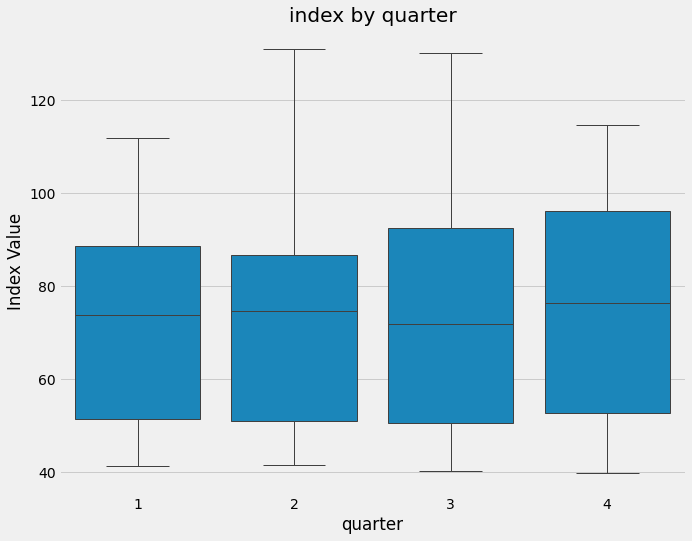

In [171]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='Index Value')
ax.set_title('index by quarter')
plt.show()

In [172]:
train = create_features(train)
test = create_features(test)
test

,Index Value,year,quarter_1,quarter_2,quarter_3,quarter_4,quarter
Date,,,,,,,
2014-03-01,88.266667,2014,True,False,False,False,1
2014-06-01,86.566667,2014,False,True,False,False,2
2014-09-01,99.744444,2014,False,False,True,False,3
2014-12-01,96.733333,2014,False,False,False,True,4
2015-03-01,88.777778,2015,True,False,False,False,1
...,...,...,...,...,...,...,...
2032-03-01,NaN,2032,True,False,False,False,1
2032-06-01,NaN,2032,False,True,False,False,2
2032-09-01,NaN,2032,False,False,True,False,3


In [173]:


FEATURES = ['year', 'quarter_1','quarter_2','quarter_3','quarter_4']	
TARGET = 'Index Value'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]
X_test

,year,quarter_1,quarter_2,quarter_3,quarter_4
Date,,,,,
2014-03-01,2014,True,False,False,False
2014-06-01,2014,False,True,False,False
2014-09-01,2014,False,False,True,False
2014-12-01,2014,False,False,False,True
2015-03-01,2015,True,False,False,False
...,...,...,...,...,...
2032-03-01,2032,True,False,False,False
2032-06-01,2032,False,True,False,False
2032-09-01,2032,False,False,True,False


In [174]:
model = LinearRegression()
model.fit(X_train, y_train)
test['prediction'] = model.predict(X_test)
print(X_test)

            year  quarter_1  quarter_2  quarter_3  quarter_4
Date                                                        
2014-03-01  2014       True      False      False      False
2014-06-01  2014      False       True      False      False
2014-09-01  2014      False      False       True      False
2014-12-01  2014      False      False      False       True
2015-03-01  2015       True      False      False      False
...          ...        ...        ...        ...        ...
2032-03-01  2032       True      False      False      False
2032-06-01  2032      False       True      False      False
2032-09-01  2032      False      False       True      False
2032-12-01  2032      False      False      False       True
2033-03-01  2033       True      False      False      False

[77 rows x 5 columns]


In [175]:
df = df.merge(test[['prediction']], how='outer', left_index=True, right_index=True)
df

,Index Value,year,quarter_1,quarter_2,quarter_3,quarter_4,quarter,prediction
Date,,,,,,,,
1989-09-01,41.500000,1989.0,False,False,True,False,3.0,NaN
1989-12-01,40.388889,1989.0,False,False,False,True,4.0,NaN
1990-03-01,41.700000,1990.0,True,False,False,False,1.0,NaN
1990-06-01,42.355556,1990.0,False,True,False,False,2.0,NaN
1990-09-01,41.455556,1990.0,False,False,True,False,3.0,NaN
...,...,...,...,...,...,...,...,...
2032-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.101067
2032-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.297826
2032-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.262604


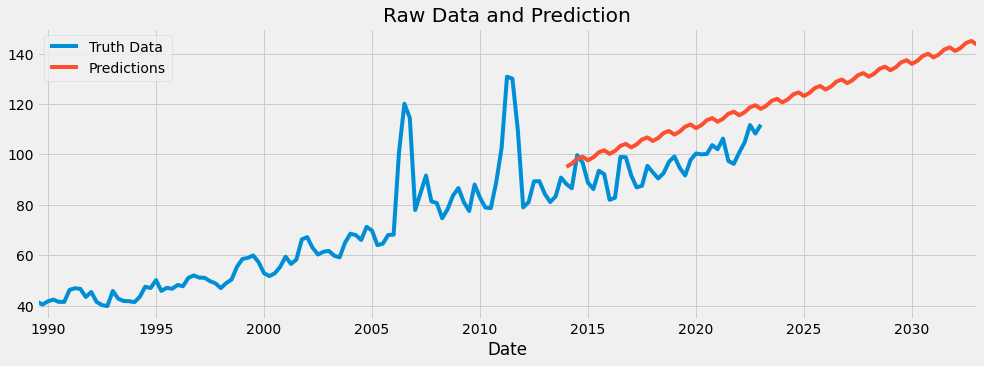

In [176]:
ax = df[['Index Value']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [177]:
coefficients = model.coef_
print("Coefficient for Quarter 1:", coefficients[0])
print("Coefficient for Quarter 2:", coefficients[1])
print("Coefficient for Quarter 3:", coefficients[2])
print("Coefficient for Year:", coefficients[3])

Coefficient for Quarter 1: 2.554148526077097
Coefficient for Quarter 2: -2.0839584278155705
Coefficient for Quarter 3: -0.8871991685563105
Coefficient for Year: 1.0775787981859424


In [178]:
tst = pd.concat([pd.DataFrame(X_test,[pd.to_datetime('2023-06-01'), 2023, False, True, True, True])])

In [179]:
X_test.loc[pd.to_datetime('2023-06-01')] = [2023, False, True, True, True]